In [1]:
# Import the connection function from the snowexsql library
from snowexsql.db import get_db

# This is what you will use for all of hackweek to access the db
db_name = 'snow:hackweek@db.snowexdata.org/snowex'

# Using the function get_db, we receive 2 ways to interact with the database
engine, session = get_db(db_name)


In [2]:
# Form a typical SQL query and use python to populate the table name
qry = "SELECT DISTINCT site_id FROM sites"

# Then we execute the sql command and collect the results
results = engine.execute(qry)

# Create a nice readable string to print the site names using python 
out = ', '.join((row['site_id'] for row in results))

# Print it with a line return for readability
print(out + '\n')

8C18, 1C1, Open 6, 2S4, 2S7, 6N36, Skyway Open, 6S22, 2S6, 9S40, 9N30, 1N1, 9N47, 1N3, 9N29, 8N45, 9N39, 8C35, 1C5, 6N31, 3S33, 5N24, 3N53, 1C7, 7N40, SNB 2, 8N55, County Line Open, 6N18, 5C20, 5N10, 8N52, 2N21, 1N5, 6S32, GML, 1S1, 2C3, 8S41, JPL 1, Forest 14, 6S53, C1, 8C11, Open, 2C13, Open Flat, Joe Wright, 8N54, 7S23, 6N16, 8C31, Open 2, 5S42, Mesa West Open, 8N34, Upper, 6C37, 5S49, 9S39, 1S17, 2S35, 1C8, BA Flux Tower, 8N9, FL2A, 5S31, 8N38, 6S26, Caples Lake, Open 4, 2S46, 8S28, 8C36, 5N15, 2C33, 6N46, 3S14, 6S15, 8N35, Skyway Tree, TLSFL2A, 2N13, 3N26, 1S8, Saddle, Banner Open, 3S47, 3S52, 4N2, 2S9, 9S51, Trench 13, 6C24, Panorama Dome, 5C27, Senator Beck, 2S25, Swamp Angel, FL1B, 9N42, 1N6, JPL 2, 2S11, 2N8, 9N59, 1N7, 8C25, 3S5, 8N58, 9C28, 2S10, 2S45, 5C21, 5S24, 7S50, 2N49, 8C22, Forest 13, 2N14, 9C17, 5N19, 2C9, 5N50, 2N4, Mores Creek Summit, LDP Tree, 1C14, 2C2, CUES, SNB 1, 8S18, Michigan River, 7C15, Irwin Barn, 2S20, 1S12, 6S44, 2S48, 9C19, 9N43, 9N56, 9N44, 8S30, 8C2

In [3]:
# Import the table classes from our data module which is where our ORM classes are defined 
from  snowexsql.data import SiteData

# Form the query to receive all the ameite_id from the sites table
qry = session.query(SiteData.site_name).distinct()

# Execute the query and collect the results
results = qry.all()

# Print it with a line return for readability
print(', '.join([row[0] for row in list(results)]))

# Close your session to avoid hanging transactions
session.close()

Cameron Pass, Sagehen Creek, Fraser Experimental Forest, Mammoth Lakes, Niwot Ridge, Boise River Basin, Little Cottonwood Canyon, East River, American River Basin, Senator Beck, Jemez River, Grand Mesa


In [5]:
from sqlalchemy import inspect

In [6]:
# Using the function get_db, we receive 2 ways to interact with the database
engine, session = get_db(db_name)

# Output the list of tables in the database 
tables = inspect(engine).get_table_names()
print(tables)

session.close()

['spatial_ref_sys', 'points', 'layers', 'sites', 'images']


In [7]:
from snowexsql.data import PointData, LayerData, ImageData, SiteData

In [8]:
# Import the class reflecting the points table in the db
from snowexsql.data import ImageData

# Import the function to investigate a table
from snowexsql.db import get_table_attributes

# Use the function to see what columns are available to use. 
db_columns = get_table_attributes(ImageData)

# Print out the results nicely
print("These are the available columns in the table:\n \n* {}\n".format('\n* '.join(db_columns)))


These are the available columns in the table:
 
* date
* date_accessed
* description
* doi
* instrument
* metadata
* observers
* raster
* registry
* site_name
* time_created
* time_updated
* type
* units



In [10]:
# This is what you will use for all of hackweek to access the db
engine, session = get_db(db_name)

# Get the unique datanames in the table
results = session.query(ImageData.type).distinct().all()
print('Available types = {}'.format(', '.join([r[0] for r in results])))
#ImageData.observers

# Get the unique instrument in the table
results = session.query(ImageData.instrument).distinct().all()
print('\nAvailable Instruments = {}'.format(', '.join([str(r[0]) for r in results])))

# Get the unique dates in the table
results = session.query(ImageData.date).distinct().all()
print('\nAvailable Dates = {}'.format(', '.join([str(r[0]) for r in results])))

# Get the unique surveyors in the table
results = session.query(ImageData.observers).distinct().all()
print('\nAvailable surveyors = {}'.format(', '.join([str(r[0]) for r in results])))

session.close()

Available types = swe, DEM, insar amplitude, insar correlation, depth, insar interferogram real, insar interferogram imaginary

Available Instruments = UAVSAR, L-band InSAR, lidar

Available Dates = None, 2020-02-13, 2020-02-21, 2020-02-12, 2020-01-31, 2020-02-01, 2020-02-02, 2020-03-11

Available surveyors = USGS, UAVSAR team, JPL, ASO Inc.


In [61]:
# Import a useful function to format that data into a dataframe
from snowexsql.conversions import query_to_geopandas

import rasterio

# Import some tools to build dates 
from datetime import date

In [14]:
from snowexsql.data import ImageData

# Grab a session
engine, session = get_db(db_name)

# What will this return?
result = session.query(ImageData.raster).limit(1).all()

print(type(result[0][0]))

session.close()

<class 'geoalchemy2.elements.RasterElement'>


/tmp/ipykernel_535/744833172.py:7: SAWarning: UserDefinedType Raster() will not produce a cache key because the ``cache_ok`` attribute is not set to True.  This can have significant performance implications including some performance degradations in comparison to prior SQLAlchemy versions.  Set this attribute to True if this type object's state is safe to use in a cache key, or False to disable this warning. (Background on this error at: https://sqlalche.me/e/14/cprf)
  result = session.query(ImageData.raster).limit(1).all()


In [31]:
# import this to use define sql functions (e.g. postgis!)
from sqlalchemy.sql import func 

# Import this to convert to a rasterio object for easy plotting
from snowexsql.conversions import raster_to_rasterio 

# Import a convenient function to plot with 
from rasterio.plot import show

# Import some tools to build dates 
from datetime import date

/tmp/ipykernel_535/4092109636.py:5: SAWarning: UserDefinedType Raster() will not produce a cache key because the ``cache_ok`` attribute is not set to True.  This can have significant performance implications including some performance degradations in comparison to prior SQLAlchemy versions.  Set this attribute to True if this type object's state is safe to use in a cache key, or False to disable this warning. (Background on this error at: https://sqlalche.me/e/14/cprf)
  result = session.query(func.ST_AsTiff(ImageData.raster)).filter(ImageData.type == 'swe').all()


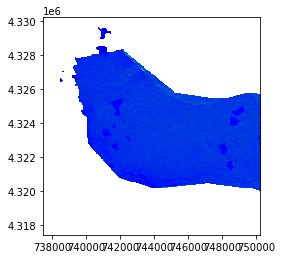

In [39]:
# Grab a session
engine, session = get_db(db_name)


# Remember in the query parentheses is what we get back, in this case were asking for the raster data as a geotiff
result = session.query(func.ST_AsTiff(ImageData.raster)).filter(ImageData.type == 'swe').filter(ImageData.date == 'collection_date').all()

# Now make it more available as a python object 
datasets = raster_to_rasterio(session, result)

# Plot the georeferenced image 
show(datasets[0], vmax=1.2, vmin=0, cmap='winter')

# Close the dataset
datasets[0].close()
session.close()

In [55]:
import matplotlib.pyplot as plt
import rioxarray as xr

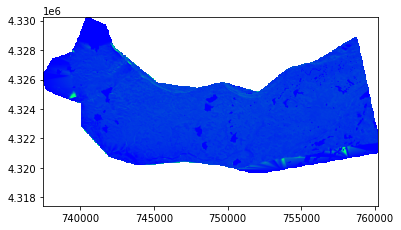

In [70]:
import geoalchemy2.functions as gfunc
# Grab a session
engine, session = get_db(db_name)

#Lets choose a site we want to grab a raster tile
site_id = 'Grand Mesa'
collection_date = date(2020, 2, 13)

# Remember in the query parentheses is what we get back, in this case were asking for the raster data as a geotiff
#result = session.query(func.ST_AsTiff(ImageData.raster)).filter(ImageData.type == 'swe').filter(SiteData.site_name == site_name).filter(ImageData.date == collection_date)
#base = gfunc.ST_Union(ImageData.raster, _type=Raster)
result = session.query(func.ST_AsTiff(gfunc.ST_Union(ImageData.raster, _type=Raster))).filter(ImageData.type == 'swe').filter(SiteData.site_name == site_name).filter(ImageData.date == collection_date)

# Now make it more available as a python object 
datasets = raster_to_rasterio(session, result)

# Plot the georeferenced image 
show(datasets[0], vmax=1.2, vmin=0, cmap='winter')

profile = datasets[0].profile

# Write to a file 
with rasterio.open('raster.tif', 'w', **profile) as dst:
    dst.write(datasets[0].read(1), 1)
    
# Close the dataset
datasets[0].close()
session.close()

In [71]:
datasets

[<closed DatasetReader name='/vsimem/3c5bfef0-d280-402b-8d24-66f544d2dcf4/3c5bfef0-d280-402b-8d24-66f544d2dcf4.tif' mode='r'>]

In [46]:
type(datasets[0])

rasterio.io.DatasetReader

In [73]:
a=xr.open_rasterio("raster.tif")
a

<xarray.DataArray (band: 1, y: 256, x: 455)>
[116480 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 7.375e+05 7.375e+05 ... 7.601e+05 7.602e+05
  * y            (y) float64 4.33e+06 4.33e+06 4.33e+06 ... 4.317e+06 4.317e+06
    spatial_ref  int64 0
Attributes:
    _FillValue:    nan
    scale_factor:  1.0
    add_offset:    0.0